In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [18]:
from src.settings import PHOTON_VOLTAGE, PLANCK_CONSTANT

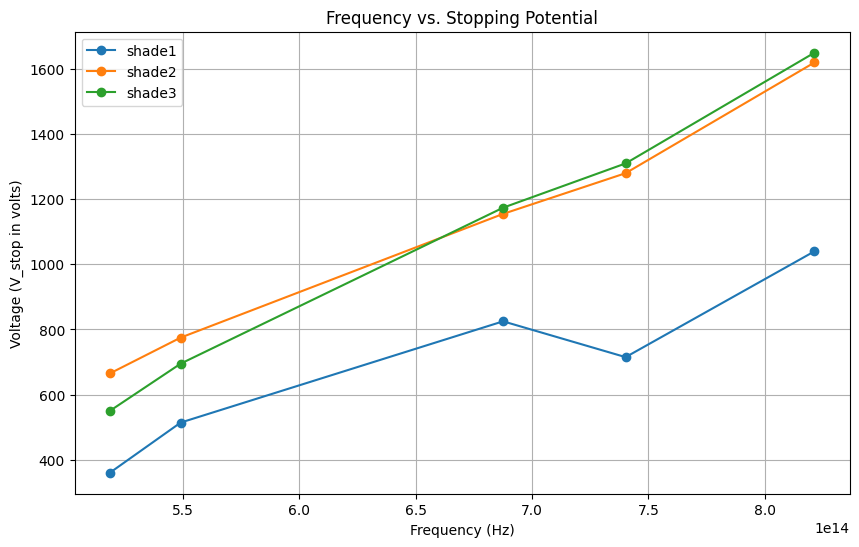

(2.8338579324359807e-12, -924.7345260800902, 17689500.20247179)

In [19]:
LIGHT_SPEED = scipy.constants.speed_of_light

frequencies = {}
for shade, data in PHOTON_VOLTAGE.items():
    frequencies[shade] = {wavelength: LIGHT_SPEED / (wavelength * 1e-9) for wavelength in data.keys()}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for shade, voltages in PHOTON_VOLTAGE.items():
    freq = [frequencies[shade][wl] for wl in voltages.keys()]
    volts = list(voltages.values())
    ax.plot(freq, volts, 'o-', label=shade)

ax.set_title('Frequency vs. Stopping Potential')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Voltage (V_stop in volts)')
ax.legend()
ax.grid(True)

plt.show()

# Prepare data for linear fit
x_data = np.array([frequencies[shade][wl] for shade in PHOTON_VOLTAGE for wl in PHOTON_VOLTAGE[shade]])
y_data = np.array([PHOTON_VOLTAGE[shade][wl] for shade in PHOTON_VOLTAGE for wl in PHOTON_VOLTAGE[shade]])

# Linear fit
slope, intercept = np.polyfit(x_data, y_data, 1)
estimated_h = slope / 1.602e-19  # Slope divided by electron charge

slope, intercept, estimated_h

In [28]:
data = pd.read_csv('src/data/u2.csv') # INPUT IS multiplied by 10 for keeping int values so we can use ** in python 
print(data)

    InputU2  VoltageU2  VoltageUA
0         5       48.4        5.0
1        11      105.7        6.0
2        13      128.8        7.0
3        14      137.5        7.1
4        15      153.8        7.2
..      ...        ...        ...
74      283     2830.0     7700.0
75      286     2860.0     6850.0
76      290     2900.0     4950.0
77      295     2950.0     3000.0
78      300     3000.0     1850.0

[79 rows x 3 columns]


In [29]:
U1 = 3.55
U3 = 1.37
FRANK_HERTZ_TEMPERATURE = 171

In [6]:
def get_extreme(U2, a, b,c):
    I = a*U2**2 + b*U2 + c 
    return I 

In [ ]:
# Plotting the data
plt.figure(figsize=(40, 20))
plt.plot(data["Input"], data["U2"], label="U2 Voltage", marker='o') # change 
plt.plot(data["Input"], data["UA"], label="UA Voltage", marker='s') # change
plt.xlabel("Voltage /V ")
plt.ylabel("Current / a.u")
plt.title("IA(U2)")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
popt_max, _ = sp.optimize.curve_fit(poly2, data["InputU2"], data["VoltageU2"])
print(sp.optimize.curve_fit(poly2, data["InputU2"], data["VoltageU2"]))
print('other:')
print(popt_max)
print('other:')
print(_)


(array([-2.99266822e-02,  1.84543175e+01, -3.46210638e+02]), array([[ 1.38860104e-06, -5.72729368e-04,  3.89422394e-02],
       [-5.72729368e-04,  2.81872179e-01, -2.32628298e+01],
       [ 3.89422394e-02, -2.32628298e+01,  2.78198699e+03]]))
other:
[-2.99266822e-02  1.84543175e+01 -3.46210638e+02]
other:
[[ 1.38860104e-06 -5.72729368e-04  3.89422394e-02]
 [-5.72729368e-04  2.81872179e-01 -2.32628298e+01]
 [ 3.89422394e-02 -2.32628298e+01  2.78198699e+03]]


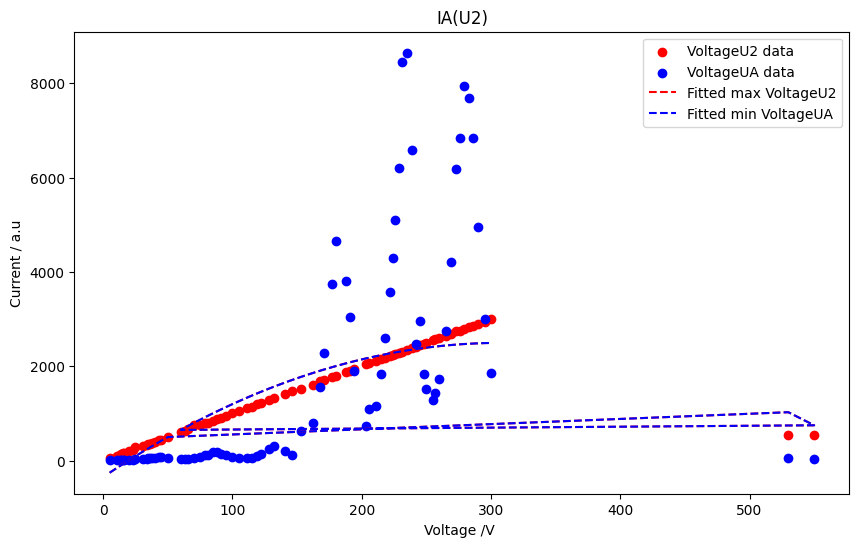

In [25]:
def poly2(x, a, b, c):
    popt, _ = sp.optimize.curve_fit(poly2, data["InputU2"], data["VoltageU2"])
        return a * x**2 + b * x + c

# Fit the curve
popt_max, _ = sp.optimize.curve_fit(poly2, data["InputU2"], data["VoltageU2"])
popt_min, _ = sp.optimize.curve_fit(poly2, data["InputU2"], data["VoltageUA"])

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(data["InputU2"], data["VoltageU2"], color='red', label='VoltageU2 data')
plt.scatter(data["InputU2"], data["VoltageUA"], color='blue', label='VoltageUA data')

plt.plot(data["InputU2"], poly2(data["InputU2"],*popt_max), color='red', linestyle='--', label='Fitted max VoltageU2')
plt.plot(data["InputU2"], poly2(data["InputU2"],*popt_max), color='blue', linestyle='--', label='Fitted min VoltageUA')

plt.xlabel("Voltage /V ")
plt.ylabel("Current / a.u")
plt.title("IA(U2)")
plt.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Zadané dáta - napätie (U_2) a prúd (I) v nA
data = [
    (0.5, 0.5), (1.1, 0.6), (1.3, 0.7), (1.4, 0.71), (1.5, 0.72), (1.6, 0.79),
    (2.0, 1.31), (2.3, 1.56), (2.5, 1.381), (3.1, 0.95), (3.4, 0.76),
    (3.5, 0.74), (3.6, 0.716), (3.8, 0.701), (4.0, 0.697), (4.3, 0.664),
    (4.5, 0.632), (5.0, 0.504), (5.3, 0.49), (5.5, 0.46), (6.0, 0.381),
    (6.3, 0.402), (6.6, 0.434), (7.0, 0.522), (7.5, 0.788), (7.9, 1.18),
    (8.1, 1.30), (8.5, 1.78), (8.8, 1.79), (9.1, 1.50), (9.5, 1.11),
    (10.0, 0.72), (10.5, 0.53), (11.1, 0.53), (11.5, 0.67), (11.9, 1.10),
    (12.2, 1.40), (12.8, 2.40), (13.2, 3.11), (14.1, 2.10), (14.6, 1.15),
    (15.3, 0.640), (16.2, 0.800), (16.8, 1.570), (17.1, 2.280), (17.7, 3.740),
    (18.0, 4.650), (18.8, 3.800), (19.1, 3.050), (19.4, 1.900), (20.3, 0.740),
    (20.6, 1.100), (21.1, 1.150), (21.5, 1.830), (21.8, 2.600), (22.2, 3.580),
    (22.4, 4.300), (22.6, 5.100), (22.9, 6.200), (23.1, 6.560), (23.5, 6.650),
    (23.9, 6.580), (24.2, 2.480), (24.5, 2.960), (24.8, 1.840), (25.0, 1.510),
    (25.5, 1.280), (25.7, 1.430), (26.0, 1.730), (26.5, 2.760), (26.9, 4.220),
    (27.3, 6.190), (27.6, 6.850), (27.9, 7.050), (28.3, 7.000), (28.6, 6.850),
    (29.0, 4.950), (29.5, 3.000), (30.0, 1.850)
]

# Extrahovanie vstupných dát
U_2, I = zip(*data)

# Vykreslenie grafu závislosti prúdu na napätí U_2
plt.figure(figsize=(10, 6))
plt.plot(U_2, I, 'bo', label='Nametené hodnoty')  # Bodový graf s nametenými hodnotami
plt.xlabel('U[V]')
plt.ylabel(' I [nA]')
plt.title('Závislosť prúdu na napätí s kvadratickým fitom')

# Nájdenie lokálnych maxim a minim zo zobrazeného grafu
from scipy.signal import argrelextrema

# Nájdenie lokálnych maxim
max_idx = argrelextrema(np.array(I), np.greater)[0]
local_maxima = [(U_2[i], I[i]) for i in max_idx]

# Nájdenie lokálnych minim
min_idx = argrelextrema(np.array(I), np.less)[0]
local_minima = [(U_2[i], I[i]) for i in min_idx]

# Výpis súradníc lokálnych maxim a minim
print("Súradnice lokálnych maxim:")
for coord in local_maxima:
    print(coord)

print("\nSúradnice lokálnych minim:")
for coord in local_minima:
    print(coord)
